# 03 SRI per Page

In [1]:
import re
from glob import iglob
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.shell import sqlContext

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.4.3
      /_/

Using Python version 3.7.3 (default, Mar 27 2019 09:23:15)
SparkSession available as 'spark'.


## Load the data

In [2]:
def loadData(file):
    data = sqlContext.read.parquet(file).toPandas()
    data['percentage'] = data['number'] / data['number'].sum() * 100
    data = data.set_index('sri')
    return data

In [3]:
dataMixed = loadData('../data/sri/2019-09/reports/03_page_per_sri/')
dataLink = loadData('../data/sri/2019-09/reports/03_page_per_sri_link/')
dataScript = loadData('../data/sri/2019-09/reports/03_page_per_sri_script/')

## Plot the data

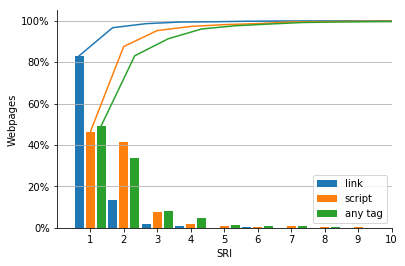

In [4]:
fig, ax = plt.subplots(1, 1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid()

ax.bar(dataLink.index-0.33, dataLink['percentage'], 0.27, label='link')
ax.bar(dataScript.index, dataScript['percentage'], 0.27, label='script')
ax.bar(dataMixed.index+0.33, dataMixed['percentage'], 0.27, label='any tag')

ax.plot(dataLink.index-0.33, dataLink['percentage'].cumsum(), label="")
ax.plot(dataScript.index, dataScript['percentage'].cumsum(), label="")
ax.plot(dataMixed.index+0.33, dataMixed['percentage'].cumsum(), label="")

ax.set_yticklabels(['{:,.0%}'.format(x / 100) for x in ax.get_yticks()])

plt.xlim(0,10)
plt.xlabel('SRI')
plt.ylabel('Webpages')

plt.legend(loc='lower right')
plt.xticks(dataMixed.index[:10])

plt.savefig('03_sri_per_page.pdf', bbox_inches='tight')

In [15]:
out = open("03_pages_per_sri.tex", 'w')
    
out.write("\def\\CCOneSriPerWebpageN{\\num{" + ("%0.2f" % dataMixed['number'][1]) + "}}\n")
out.write("\def\\CCOneSriPerWebpageP{\\num{" + ("%0.2f" % dataMixed['percentage'][1]) + "}\%}\n")
out.write("\def\\CCTwoSriPerWebpageN{\\num{" + ("%0.2f" % dataMixed['number'][2]) + "}}\n")
out.write("\def\\CCTwoSriPerWebpageP{\\num{" + ("%0.2f" % dataMixed['percentage'][2]) + "}\%}\n")
out.write("\def\\CCOneLinkSriPerWebpageN{\\num{" + ("%0.2f" % dataLink['number'][1]) + "}}\n")
out.write("\def\\CCOneLinkSriPerWebpageP{\\num{" + ("%0.2f" % dataLink['percentage'][1]) + "}\%}\n")


out.close()

In [10]:
dataMixed['number'][1]

36637513

In [ ]:
da